In [1]:
import gensim
import numpy as np
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
import plotly.offline as plt
import plotly.graph_objs as go
plt.init_notebook_mode(connected=True)
from tqdm import tqdm

In [2]:
def get_coordinates(model, words):
    arr = np.empty((0,200), dtype='f')
    labels = []
    for wrd_score in words:
        try:
            wrd_vector = model[wrd_score]
            # print(wrd_vector)
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
            labels.append(wrd_score)
        except:
            pass
    tsne = TSNE(n_components=3, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    z_coords = Y[:, 2]
    return x_coords, y_coords, z_coords

## Unique Tokens from German Civil Code

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
txt_file = open('englisch_bgb_100.txt', 'r', encoding='utf-8')
lines = txt_file.readlines()
unique_tokens = []
for line in tqdm(lines):
  # print(line)
  doc = nlp(line)
  for token in doc:
    if token.is_digit or token.is_punct or token.is_space or token.is_stop:
      continue
    word_to_append = token.lower_
    if word_to_append not in unique_tokens:
      unique_tokens.append(word_to_append)
    

In [8]:
unique_tokens

['\ufeffbook',
 'general',
 'division',
 'persons',
 'title',
 'natural',
 'consumers',
 'entrepreneurs',
 'section',
 'beginning',
 'legal',
 'capacity',
 'human',
 'begins',
 'completion',
 'birth',
 'majority',
 'age',
 'eighteen',
 'sections',
 'repealed',
 'residence',
 'establishment',
 'termination',
 'person',
 'settles',
 'permanently',
 'place',
 'establishes',
 'time',
 'terminated',
 'abandons',
 'intention',
 'giving',
 'lack',
 'contract',
 'service',
 'provided',
 'federal',
 'ministry',
 'justice',
 'consumer',
 'protection',
 'office',
 'www.gesetze-im-internet.de',
 'page',
 'capable',
 'contracting',
 'limited',
 'establish',
 'terminate',
 'consent',
 'representative',
 'minor',
 'married',
 'independently',
 'soldier',
 'garrison',
 'country',
 'deemed',
 'provisions',
 'apply',
 'soldiers',
 'merely',
 'compulsory',
 'military',
 'child',
 'shares',
 'parents',
 'share',
 'parent',
 'lacks',
 'right',
 'care',
 'retains',
 'validly',
 'use',
 'disputed',
 'interes

## GloVe embeddings

In [4]:
import gensim.downloader as api

# info = api.info()  # show info about available models/datasets
model = api.load("glove-wiki-gigaword-200")  # download the model and return as object ready for use
# model.most_similar("cat")

In [29]:
x, y, z = get_coordinates(model, unique_tokens)

plot = [go.Scatter3d(x = x,
                    y = y,
                    z = z,
                    mode = 'markers+text',
                    text = unique_tokens,
                    textposition='bottom center',
                    hoverinfo = 'text',
                    marker=dict(size=5,opacity=0.8))]

layout = go.Layout(title='GloVe word embeddings')
fig = go.Figure(data=plot, layout=layout)
plt.iplot(fig)

## Law2Vec embeddings

In [15]:
law2vec_file = open(r'E:\Uni_Projects\Coliee2020\Law2Vec\Law2Vec.200d.txt', 'r', encoding='utf-8')
lines = law2vec_file.readlines()

169439 200

the -0.09357934 0.007608318 0.1757062 0.19308278 0.03624476 0.105479464 0.017503448 -0.21363369 0.20059411 0.07599709 -0.11156025 -0.2106987 -0.31652382 -0.16975656 0.06683612 0.23274615 -0.25509524 0.076928824 0.2234078 -0.15148184 -0.021034092 -0.19260158 0.31868482 0.081167616 -0.26790744 0.0083939675 0.30514082 -0.0056995354 -0.12046813 -0.026774952 0.35363355 -0.08988823 -0.3666479 -0.070664704 0.03894586 0.30603972 0.08816808 0.07131997 -0.15154819 0.09488626 -0.047906205 -0.04720717 0.09644635 0.13248436 0.12791337 0.043729838 0.034184154 0.18364619 -0.06200905 0.10087616 -0.0651255 0.2389254 0.08399831 0.026357967 -0.22917993 0.030423252 -0.2878015 -0.086659625 0.105579935 -0.04634194 0.05803819 0.06452356 -0.013060207 0.12606785 0.10940307 -0.04837331 -0.021549542 -0.3946819 0.13118295 0.005418873 -0.14772289 -0.12667973 0.12057408 -0.30303648 -0.004885485 0.045750313 0.025890406 0.23716393 -0.18899229 0.14234626 0.2592803 -0.062828146 -0.028279103 0.12177479 -0.06

In [25]:
law2vec_model = {}
for line in lines[1:]:
    word = line.split()[0]
    vector = line.split()[1:]
    vec = []
    for v in vector:
        vec.append(float(v))
    law2vec_model[word] = vec

In [24]:
law2vec_model['the']

[-0.09357934,
 0.007608318,
 0.1757062,
 0.19308278,
 0.03624476,
 0.105479464,
 0.017503448,
 -0.21363369,
 0.20059411,
 0.07599709,
 -0.11156025,
 -0.2106987,
 -0.31652382,
 -0.16975656,
 0.06683612,
 0.23274615,
 -0.25509524,
 0.076928824,
 0.2234078,
 -0.15148184,
 -0.021034092,
 -0.19260158,
 0.31868482,
 0.081167616,
 -0.26790744,
 0.0083939675,
 0.30514082,
 -0.0056995354,
 -0.12046813,
 -0.026774952,
 0.35363355,
 -0.08988823,
 -0.3666479,
 -0.070664704,
 0.03894586,
 0.30603972,
 0.08816808,
 0.07131997,
 -0.15154819,
 0.09488626,
 -0.047906205,
 -0.04720717,
 0.09644635,
 0.13248436,
 0.12791337,
 0.043729838,
 0.034184154,
 0.18364619,
 -0.06200905,
 0.10087616,
 -0.0651255,
 0.2389254,
 0.08399831,
 0.026357967,
 -0.22917993,
 0.030423252,
 -0.2878015,
 -0.086659625,
 0.105579935,
 -0.04634194,
 0.05803819,
 0.06452356,
 -0.013060207,
 0.12606785,
 0.10940307,
 -0.04837331,
 -0.021549542,
 -0.3946819,
 0.13118295,
 0.005418873,
 -0.14772289,
 -0.12667973,
 0.12057408,
 -0.3

In [27]:
x, y, z = get_coordinates(law2vec_model, unique_tokens)

plot = [go.Scatter3d(x = x,
                    y = y,
                    z = z,
                    mode = 'markers+text',
                    text = unique_tokens,
                    textposition='bottom center',
                    hoverinfo = 'text',
                    marker=dict(size=5,opacity=0.8))]

layout = go.Layout(title='Law2Vec word embeddings')
fig = go.Figure(data=plot, layout=layout)
plt.iplot(fig)

##  Plots in 2D

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def tsne_plot(model, words):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      try:
          tokens.append(model[word])
          labels.append(word)
      except:
          pass
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(50, 50)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

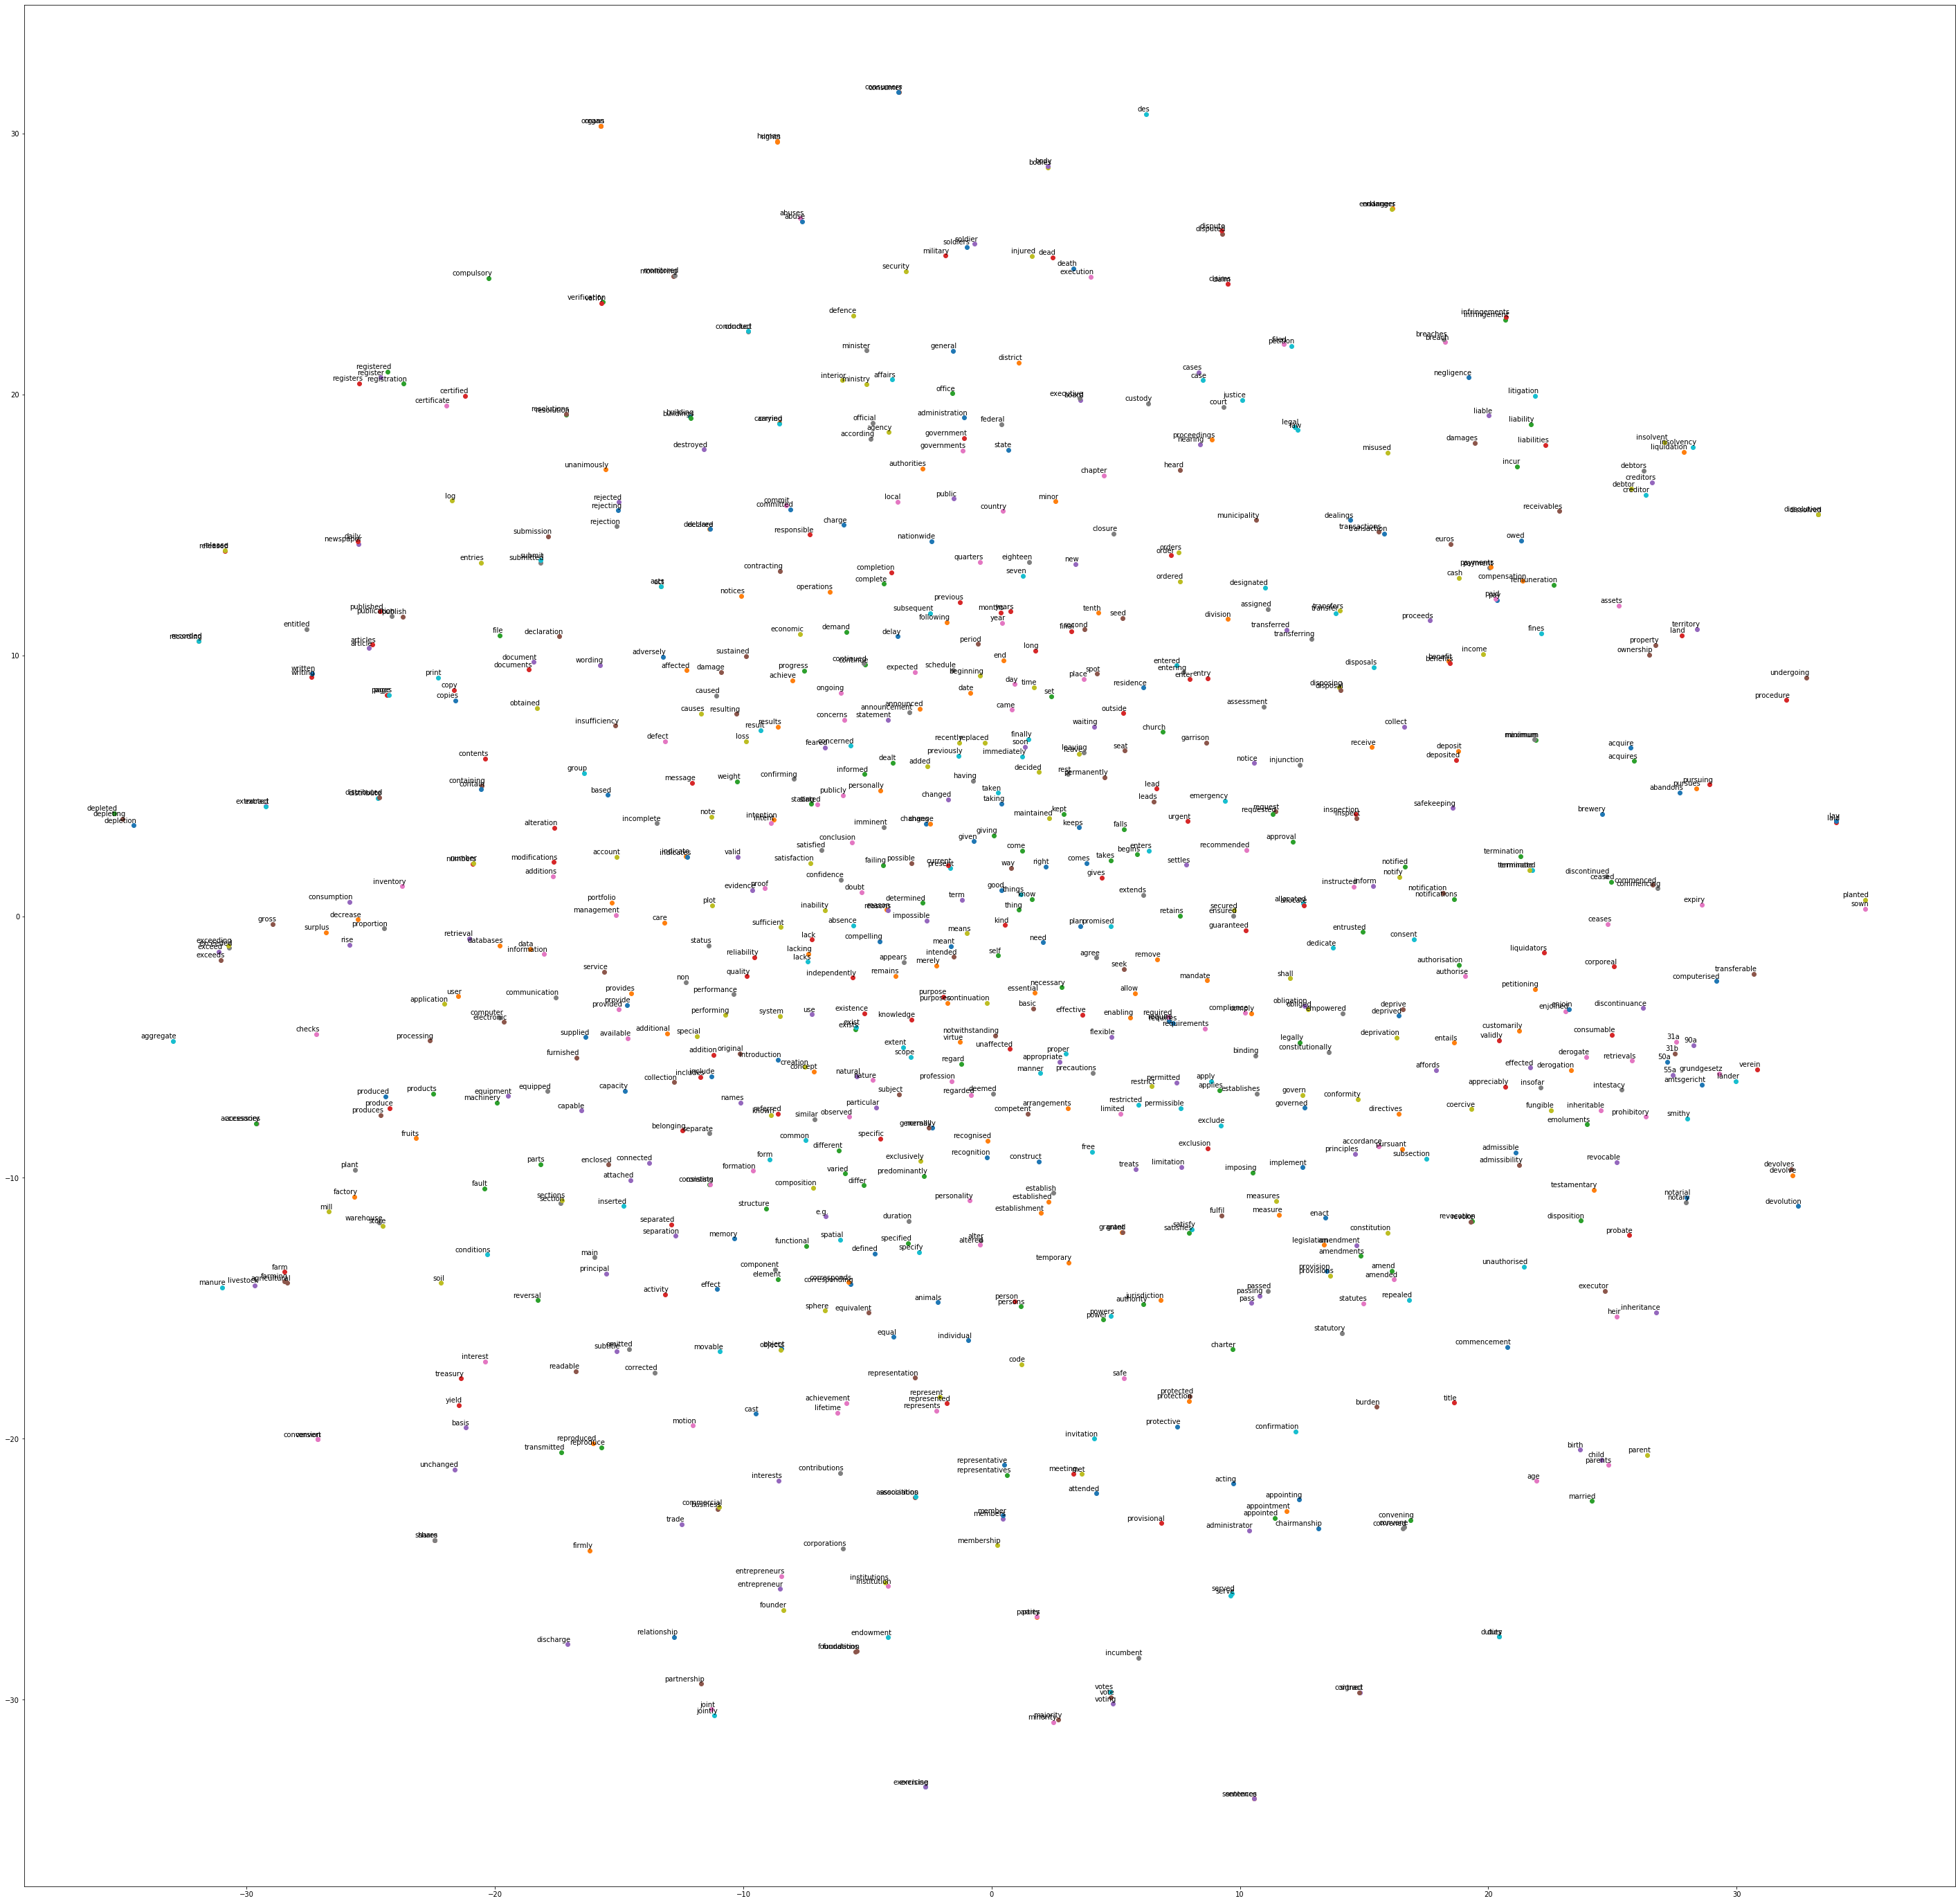

In [34]:
tsne_plot(model, unique_tokens)

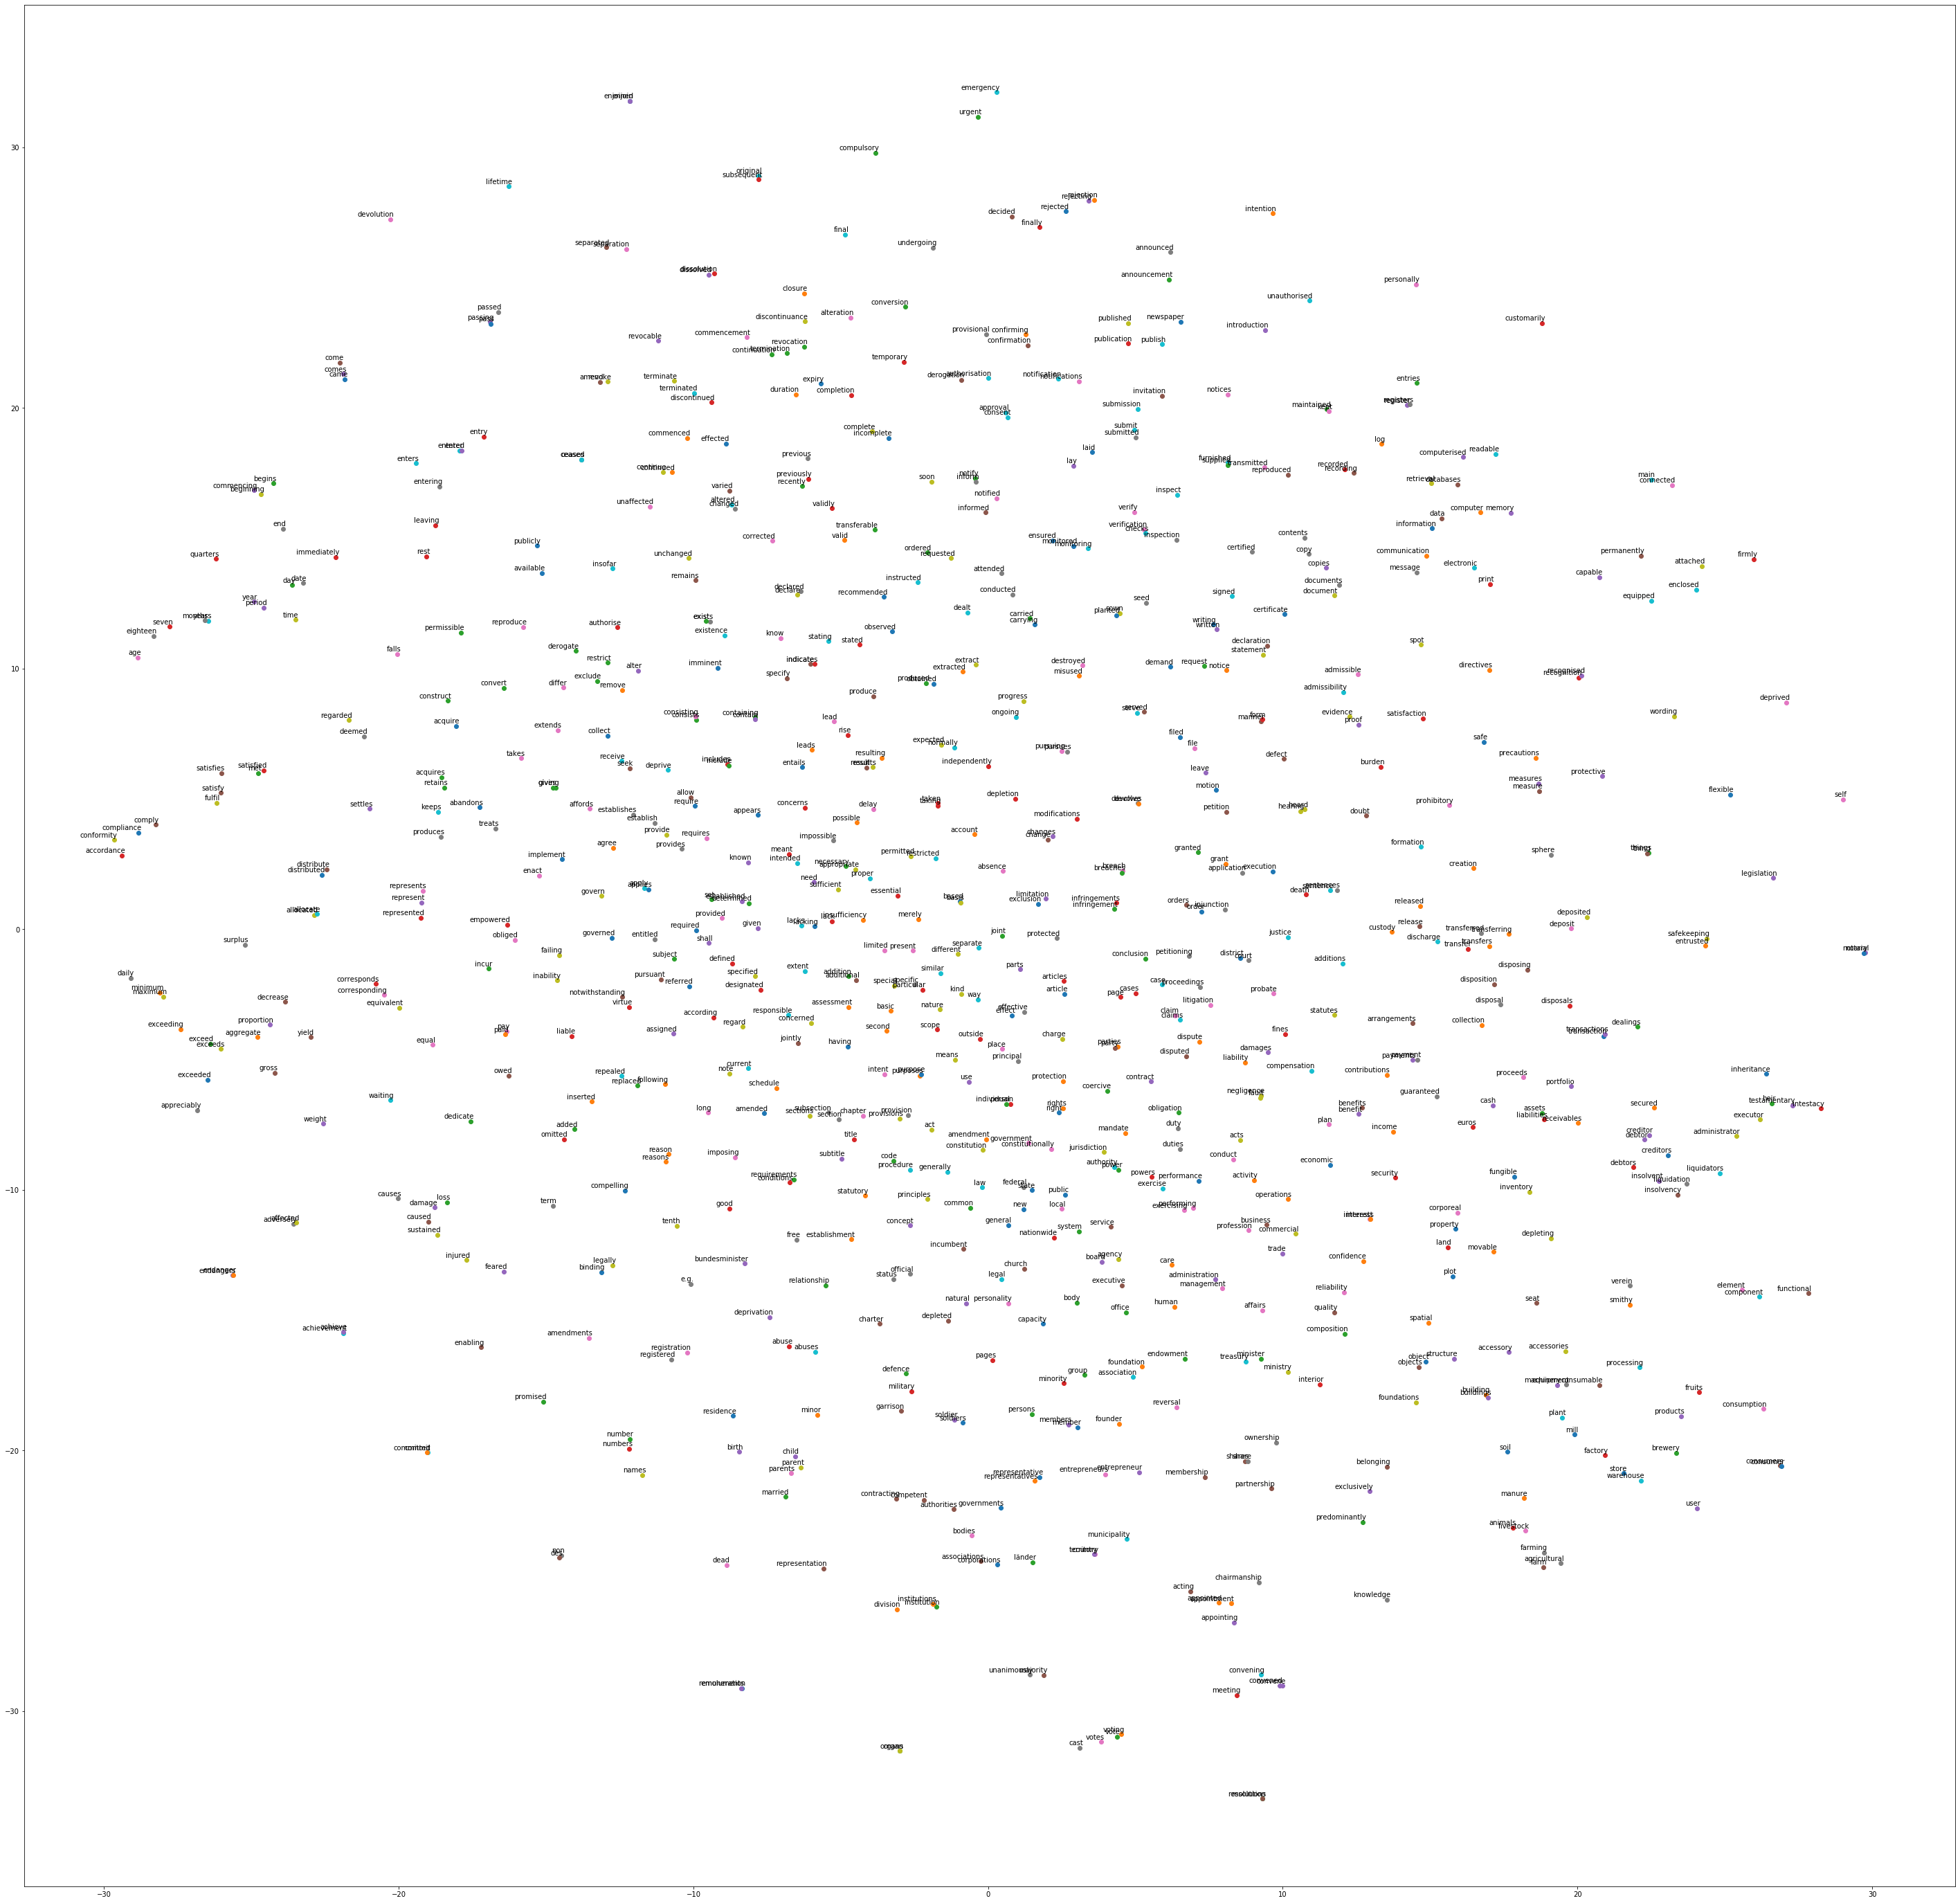

In [35]:
tsne_plot(law2vec_model, unique_tokens)